In [11]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

% matplotlib inline

In [85]:
nodes,weights = np.polynomial.legendre.leggauss(3)

# quadratic basis functions
def gamma_0(u):
    return (u**2 - u)/2

def gamma_1(u):
    return 1 - u**2

def gamma_2(u):
    return (u**2 + u)/2

def dgamma_0_du(u):
    return u - 0.5

def dgamma_1_du(u):
    return -2*u

def dgamma_2_du(u):
    return u + 0.5

def gamma_inner():
    A = np.zeros((3,3))
    A[0,0] =  np.sum(weights*gamma_0(nodes)*gamma_0(nodes))
    A[0,1] = np.sum(weights*gamma_0(nodes)*gamma_1(nodes))
    A[0,2] = np.sum(weights*gamma_0(nodes)*gamma_2(nodes))
    A[1,1] = np.sum(weights*gamma_1(nodes)*gamma_1(nodes))
    A[1,2] = np.sum(weights*gamma_1(nodes)*gamma_2(nodes))
    A[2,2] = np.sum(weights*gamma_2(nodes)*gamma_2(nodes))
    
    A = A + A.T - np.diag(np.diag(A))
    return A

def gamma_inner_dx():
    A = np.zeros((3,3))
    A[0,0] = np.sum(weights*gamma_0(nodes)*dgamma_0_du(nodes))
    A[0,1] = np.sum(weights*gamma_1(nodes)*dgamma_0_du(nodes))
    A[0,2] = np.sum(weights*gamma_2(nodes)*dgamma_0_du(nodes))
    A[1,0] = np.sum(weights*gamma_0(nodes)*dgamma_1_du(nodes))
    A[1,1] = np.sum(weights*gamma_1(nodes)*dgamma_1_du(nodes))
    A[1,2] = np.sum(weights*gamma_2(nodes)*dgamma_1_du(nodes))
    A[2,0] = np.sum(weights*gamma_0(nodes)*dgamma_2_du(nodes))
    A[2,1] = np.sum(weights*gamma_1(nodes)*dgamma_2_du(nodes))
    A[2,2] = np.sum(weights*gamma_2(nodes)*dgamma_2_du(nodes))
    return A

def f(x):
    return 1

def Qf_Uf_solve(f,tau):
    ### first element
    A = np.zeros((13,13))
    A[0:3,0:3] += (0.25)*gamma_inner()
    A[0:3,3:6] -= gamma_inner_dx()
    A[3:6,0:3] -= gamma_inner_dx()
    # boundary stuff
    A[3,0] -= 1
    A[3,3] += tau
    A[5,2] -=1
    A[5,5] += tau
    
    ### second element
    A[6:9,6:9] += 0.25*gamma_inner()
    A[6:9,9:12] -= gamma_inner_dx()
    A[9:12,6:9] -= gamma_inner_dx()
    # boundary stuff
    A[9,6] -= 1
    A[9,9] += tau
    A[11,8] -= 1
    A[11,11] += tau
    
    # no interface
    A[12,12] = 1
    
    b = np.zeros(13,)
    new_nodes = 0.25*(nodes + 1)
    b[3] = 0.25*np.sum(weights*f(new_nodes)*gamma_0(nodes))
    b[4] = 0.25*np.sum(weights*f(new_nodes)*gamma_1(nodes))
    b[5] = 0.25*np.sum(weights*f(new_nodes)*gamma_2(nodes))
    
    new_nodes = 0.25*nodes + 0.75
    b[9] = 0.25*np.sum(weights*f(new_nodes)*gamma_0(nodes))
    b[10] = 0.25*np.sum(weights*f(new_nodes)*gamma_1(nodes))
    b[11] = 0.25*np.sum(weights*f(new_nodes)*gamma_2(nodes))
    
    c = la.solve(A,b)
    
    return A,b,c

In [101]:
Z = Qf_Uf_solve(f,1.0)

In [102]:
coeff = np.zeros(6,)
coeff[0:3] = Z[2][3:6]
coeff[3:6] = Z[2][9:12]

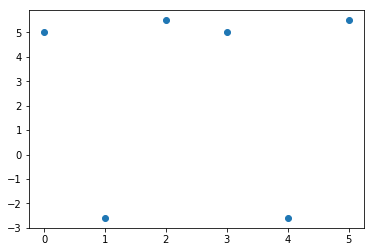

In [103]:
plt.plot(coeff,'o')

In [104]:
Z[2]

array([ 4.75   , -2.5    ,  5.25   ,  5.     , -2.59375,  5.5    ,
        4.75   , -2.5    ,  5.25   ,  5.     , -2.59375,  5.5    ,  0.     ])